# Quickstart

## Dependences

### LaTeX

LaTeX must be installed. See:

- [TeX Live](https://tug.org/texlive/) (All Platforms)
- [MikTeX](https://miktex.org/) (Windows)
- [MacTeX](https://www.tug.org/mactex/) (Mac)

### Poppler

This application requires Poppler’s `pdftocairo`. You must install it beforehand.

#### Conda - Platform Independent

```shell
conda install -c conda-forge poppler
```

#### Windows

Download Poppler for Windows [here](https://github.com/oschwartz10612/poppler-windows/releases/). You must add the `bin` folder to your [PATH](https://www.c-sharpcorner.com/article/how-to-addedit-path-environment-variable-in-windows-11/).

#### Linux

Most distributions come with `pdftocairo`. If it is not installed, refer to your package manager and

#### Mac

Install using `brew`:

```shell
brew install poppler
```

To check if `pdftocairo` is installed on your system, you can use the following command:

In [1]:
!pdftocairo -v

pdftocairo version 24.04.0
Copyright 2005-2024 The Poppler Developers - http://poppler.freedesktop.org
Copyright 1996-2011, 2022 Glyph & Cog, LLC


Alternatively, if you are facing issues, you can configure the `pdftocairo` location (for use in `jupyter_tikz`) by setting the environment variable `JUPYTER_TIKZ_PDFTOCAIROPATH`:

```python
import os
custom_pdftocairo_path = os.path.join(
        os.getenv("LOCALAPPDATA"), "Poppler", "Library", "bin", "pdftocairo.exe"
    )
os.environ["JUPYTER_TIKZ_PDFTOCAIROPATH"] = custom_pdftocairo_path
```

## Basic usage

Load `jupyter_tikz`. It is a magic cell extension:

In [2]:
%load_ext jupyter_tikz

Show help by typing `%tikz?`

In [3]:
%tikz?

Docstring:
::

  %tikz [-p LATEX_PREAMBLE] [-t TEX_PACKAGES] [-nt] [-l TIKZ_LIBRARIES]
            [-lp PGFPLOTS_LIBRARIES] [-i] [-f] [-sc SCALE] [-r] [-d DPI] [-e]
            [-tp TEX_PROGRAM] [-s SAVE_TEX] [-S SAVE_IMAGE]
            [code]

Renders a TikZ diagram in a Jupyter notebook cell. Works as both as %tikz and %%tikz.

When used as %tikz, the code argument is required:
    In [1]: %tikz \draw (0,0) rectangle (1,1);

As a cell, this will run a block of TikZ code:
    In [2]: %%tikz
        \draw (0,0) rectangle (1,1);

Additional options can be passed to the magic command:
    In [3]: %%tikz --rasterize --dpi=1200 -l arrows,automata
        \draw (0,0) rectangle (1,1);
        \filldraw (0.5,0.5) circle (.1);

positional arguments:
  code                  the variable in IPython with the string source

options:
  -p LATEX_PREAMBLE, --latex_preamble LATEX_PREAMBLE
                        LaTeX preamble to insert before document, e.g., -x
                        "$preamble", wi

Create a simple `tikzpicture`:

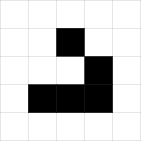

In [4]:
%%tikz
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=black] (1, 1) rectangle (2, 2);
    \draw[fill=black] (2, 1) rectangle (3, 2);
    \draw[fill=black] (3, 1) rectangle (4, 2);
    \draw[fill=black] (3, 2) rectangle (4, 3);
    \draw[fill=black] (2, 3) rectangle (3, 4);
\end{tikzpicture}

Alternatively, generate TikZ output using a complete document by using the `-f` (or `--full-document`) parameter:

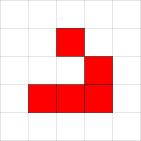

In [5]:
%%tikz -f
\documentclass[tikz]{standalone}
\begin{document}
    \begin{tikzpicture}
        \draw[help lines] grid (5, 5);
        \draw[fill=red] (1, 1) rectangle (2, 2);
        \draw[fill=red] (2, 1) rectangle (3, 2);
        \draw[fill=red] (3, 1) rectangle (4, 2);
        \draw[fill=red] (3, 2) rectangle (4, 3);
        \draw[fill=red] (2, 3) rectangle (3, 4);
    \end{tikzpicture}
\end{document}

Or, write only the content inside the `tikzpicture` environment by using the `-i` (or `--implicit-pic`) parameter. This will generate a standalone document with the `tikzpicture` environment:

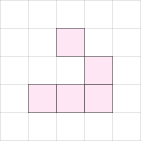

In [6]:
%%tikz -i
\draw[help lines] grid (5, 5);
\draw[fill=magenta!10] (1, 1) rectangle (2, 2);
\draw[fill=magenta!10] (2, 1) rectangle (3, 2);
\draw[fill=magenta!10] (3, 1) rectangle (4, 2);
\draw[fill=magenta!10] (3, 2) rectangle (4, 3);
\draw[fill=magenta!10] (2, 3) rectangle (3, 4);

**Attention:** You cannot use `-f` and `-i` together.

In [7]:
%%tikz -i -f
    \draw (0,0) rectangle (1,1);

Can't use --full-document and --implicit-pic together


## Using preamble

You can set a preamble by using the flag `-p="$<name_of_preamble>"` (or `--preamble="$<name_of_preamble>"`). The preamble includes all LaTeX code before `\begin{document}`, except for the `documentclass` line.

Adding a preamble defining a custom color:

In [8]:
preamble = r"""
\usepackage{tikz}
\usepackage{xcolor}
\definecolor{my_color}{RGB}{0, 238, 255}
"""

Reuse the preamble in a standalone TeX document:

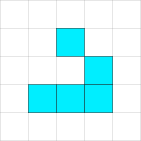

In [9]:
%%tikz -p "$preamble"
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=my_color] (1, 1) rectangle (2, 2);
    \draw[fill=my_color] (2, 1) rectangle (3, 2);
    \draw[fill=my_color] (3, 1) rectangle (4, 2);
    \draw[fill=my_color] (3, 2) rectangle (4, 3);
    \draw[fill=my_color] (2, 3) rectangle (3, 4);
\end{tikzpicture}

This also works with an implicit `tikzpicture` environment:

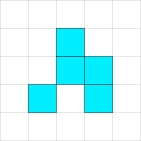

In [10]:
%%tikz -p "$preamble" -i
\draw[help lines] grid (5, 5);
\draw[fill=my_color] (1, 1) rectangle (2, 2);
\draw[fill=my_color] (3, 1) rectangle (4, 2);
\draw[fill=my_color] (2, 2) rectangle (3, 3);
\draw[fill=my_color] (3, 2) rectangle (4, 3);
\draw[fill=my_color] (2, 3) rectangle (3, 4);

## Loading packages and libraries

If you are not using the `-f` (or `--full-document`) flag, it's often useful to:

- Set the `\usepackage{X,Y,Z}` via `--t=<X,Y,Z>` (or `--tex-packages=<X,Y,Z>`)
- Set the `\usetikzlibrary{X,Y,Z}` via `--l=<X,Y,Z>` (or `--tikz-libraries=<X,Y,Z>`)
- Set the `\usepgfplotslibrary{X,Y,Z}` via `-lp=<X,Y,Z>` (or `--pgfplots-libraries=<X,Y,Z>`)

> **Note:** The `tikz` package is imported automatically.

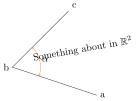

In [11]:
%%tikz -i -l=quotes,angles -t=amsfonts
% Example from Paul Gaborit
% http://www.texample.net/tikz/examples/angles-quotes/
\draw
    (3,-1) coordinate (a) node[right] {a}
    -- (0,0) coordinate (b) node[left] {b}
    -- (2,2) coordinate (c) node[above right] {c}
    pic["$\alpha$", draw=orange, <->, angle eccentricity=1.2, angle radius=1cm]
    {angle=a--b--c};
    
\node[rotate=10] (r) at (2.5, 0.65) {Something about in $\mathbb{R}^2$};

If you don't want to import the `tikz` package, you can use the flag `-nt` (or `--no-tikz`):

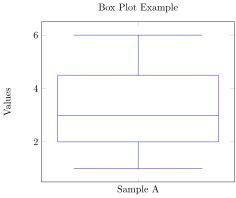

In [12]:
%%tikz -i -nt -t=pgfplots --pgfplots-libraries=statistics
\begin{axis}[
    title={Box Plot Example},
    boxplot/draw direction=y,
    ylabel={Values},
    xtick={1,2,3},
    xticklabels={Sample A, Sample B, Sample C},
]
% Sample A
\addplot+[
    boxplot prepared={
        median=3,
        upper quartile=4.5,
        lower quartile=2,
        upper whisker=6,
        lower whisker=1,
    },
] coordinates {};
\end{axis}

## Scaling output

You can scale the Tikz image using the `-sc` (or `--scale`) parameter:
> **Note**: It uses `\boxscale` from the `graphicx` package

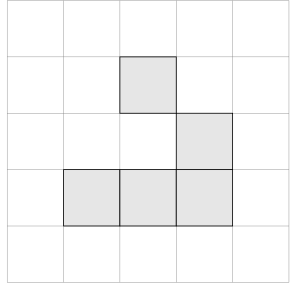

In [13]:
%%tikz -i -sc=2
\draw[help lines] grid (5, 5);
\draw[fill=black!10] (1, 1) rectangle (2, 2);
\draw[fill=black!10] (2, 1) rectangle (3, 2);
\draw[fill=black!10] (3, 1) rectangle (4, 2);
\draw[fill=black!10] (3, 2) rectangle (4, 3);
\draw[fill=black!10] (2, 3) rectangle (3, 4);

Which also works with standalone documents:
> **Note**: Not applicable with the `-f` (or `--full-document`) parameter

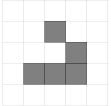

In [14]:
%%tikz -sc=0.75
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=black!50] (1, 1) rectangle (2, 2);
    \draw[fill=black!50] (2, 1) rectangle (3, 2);
    \draw[fill=black!50] (3, 1) rectangle (4, 2);
    \draw[fill=black!50] (3, 2) rectangle (4, 3);
    \draw[fill=black!50] (2, 3) rectangle (3, 4);
\end{tikzpicture}

## Rasterize the image

You can display the output as a rasterized (`png`) image by setting the `-r` (or `--rasterize`) parameter.

It is also possible to set the resolution (dots per inch) by using `-d=<dpi_of_image>` (or `--dpi=<dpi_of_image>`):

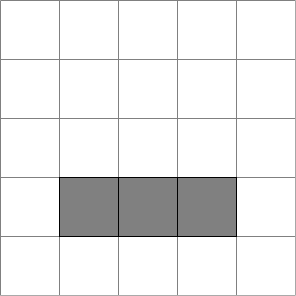

In [15]:
%%tikz -r --dpi=150
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=black!50] (1, 1) rectangle (2, 2);
    \draw[fill=black!50] (2, 1) rectangle (3, 2);
    \draw[fill=black!50] (3, 1) rectangle (4, 2);
\end{tikzpicture}

## Save

You can save the image output by setting `-S=<name_of_image>` (or `--save-image=<name_of_image>`):

> **Note:** The magic automatically detects the output format. It is not necessary to include the file extension (`.png` or `.svg`).

Saving an `svg` file:

> **Note:** You can specify folders by using the `-S` parameter (e.g., `-S=outputs/file_name` saves to `./outputs/conway.svg`).

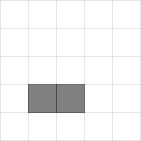

In [16]:
%%tikz --save-image=outputs/conway
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=black!50] (1, 1) rectangle (2, 2);
    \draw[fill=black!50] (2, 1) rectangle (3, 2);
\end{tikzpicture}

Saving a `png` file:

> **Note:** Use the `-r` or `--rasterize` argument.

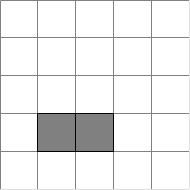

In [17]:
%%tikz --save-image=outputs/conway --rasterize
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=black!50] (1, 1) rectangle (2, 2);
    \draw[fill=black!50] (2, 1) rectangle (3, 2);
\end{tikzpicture}

You can save TikZ (or LaTeX) output by using `-s=<tikz_file.tikz>` (or `--save-tex=<tex_file.tikz>`):

> **Note 1:** This command saves the cell content to a file.

> **Note 2:** You can use any file extension, e.g., `-s=file.txt`, `-s=file.tex`, `-s=file.tikz`.

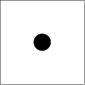

In [18]:
%%tikz --save-image=outputs/a_dot -s=outputs/a_dot.tikz
\begin{tikzpicture}[scale=3]
    \draw (0,0) rectangle (1,1);
    \filldraw (0.5,0.5) circle (.1);
\end{tikzpicture}

To make it easier, set the `JUPYTER_TIKZ_SAVEDIR` environment to always save files in a custom folder:

In [19]:
import os
current_dir = os.getcwd()
os.environ['JUPYTER_TIKZ_SAVEDIR'] = os.path.join(current_dir, "outputs")

Now, render the `tikzpicture` and save the output:

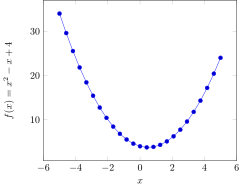

In [20]:
%%tikz -S=quadratic -s=quadratic.tikz -i -t=pgfplots -nt
\begin{axis}[
  xlabel=$x$,
  ylabel={$f(x) = x^2 - x +4$}
]
\addplot {x^2 - x +4};
\end{axis}

In [21]:
del os.environ['JUPYTER_TIKZ_SAVEDIR']

## Using IPython strings

Sometimes, you may want to generate a TikZ document from a string, rather than from cell content. You can do this using line magic.

In [22]:
conway_str = r"""\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}
\draw[help lines] grid (5, 5);
\draw[fill=magenta] (1, 1) rectangle (2, 2);
\draw[fill=magenta] (2, 1) rectangle (3, 2);
\draw[fill=magenta] (3, 1) rectangle (4, 2);
\draw[fill=magenta] (3, 2) rectangle (4, 3);
\draw[fill=magenta] (2, 3) rectangle (3, 4);
\end{tikzpicture}
\end{document}"""

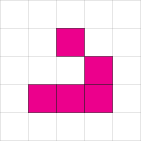

In [23]:
%tikz -f -S=cornway_image -s=cornway_code.tex conway_str

## Debuging and error

If you write invalid TikZ code, it will display the LaTeX command line error message:

> **Note:** Since LaTeX command line error messages tend to be verbose, by default, only the tail (last 20 lines) is shown.

In [24]:
%%tikz -i
% Error: Forgot Comma after the first coordinate
\draw[fill=black] (1, 1) rectangle (2, 2)

ase.sty
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/latex/00miktex\epstopdf-sys.c
fg))

! Package tikz Error: Giving up on this path. Did you forget a semicolon?.

See the tikz package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.7 	\end{tikzpicture}
                      
? 
! Emergency stop.
 ...                                              
                                                  
l.7 	\end{tikzpicture}
                      
!  ==> Fatal error occurred, no output PDF file produced!
Transcript written on tikz.log.


If you want to see the entire error message, you can use the `-e` (or `--full-error`) parameter:

In [25]:
%%tikz -i -e
% Error: Comma after the first coordinate
\draw[fill=black] (1, 1) rectangle (2, 2)

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (MiKTeX 24.4) (preloaded format=pdflatex.fmt)
 restricted \write18 enabled.
entering extended mode
(tikz.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-03-14>

(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/latex/standalone\standalone.c
ls
Document Class: standalone 2022/10/10 v1.3b Class to compile TeX sub-files stan
dalone
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/latex/tools\shellesc.sty)
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifluatex.sty
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/latex/xkeyval\xkeyval.sty
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/generic/xkeyval\xkeyval.tex
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/generic/xkeyval\xkvutils.tex
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/generic/xkeyval\keyval.tex)))
)
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/latex/sta